# Homework 5 - The Marvel Universe!

## Import libraries

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import json
from tabulate import tabulate
from collections import Counter
from collections import defaultdict
import numpy as np

## 1 - Data

## 1.1 - Data Preprocessing

### Loading data:

In [ ]:
nodes = pd.read_csv("nodes.csv", sep = ',')
edges = pd.read_csv("edges.csv", sep = ',')
hero_net = pd.read_csv("hero-network.csv", sep = ',')

### 1) Fixing inconsistencies

- Removing extra spaces in both columns of hero names from file `hero-network.csv`.

In [ ]:
#Entries with trailing spaces in column hero1
hero_net[hero_net.hero1.str.endswith(' ')].head()

,hero1,hero2
18,IRON MAN/TONY STARK,"FORTUNE, DOMINIC"
19,IRON MAN/TONY STARK,"ERWIN, CLYTEMNESTRA"
55,STARSHINE II/BRANDY,"ROM, SPACEKNIGHT"
105,STARSHINE II/BRANDY,DOCTOR DREDD
106,STARSHINE II/BRANDY,"TARR, BLACK JACK"


In [ ]:
#Entries with trailing spaces in column hero2
hero_net[hero_net.hero2.str.endswith(' ')].head()

,hero1,hero2
8,"STEELE, SIMON/WOLFGA",IRON MAN/TONY STARK
13,"RAVEN, SABBATH II/EL",IRON MAN/TONY STARK
17,IRON MAN IV/JAMES R.,IRON MAN/TONY STARK
43,GHOST,IRON MAN/TONY STARK
46,IRON MAN IV/JAMES R.,IRON MAN/TONY STARK


In [ ]:
#Count the total number of entries with trailing spaces in hero1 and hero2
print("Observations in hero-network (hero1) with extra trailing spaces:\n",
      hero_net[hero_net.hero1.str.endswith(' ')].count()['hero1'])
print("Observations in hero-network (hero2) with extra trailing spaces:\n",
      hero_net[hero_net.hero2.str.endswith(' ')].count()['hero2'])

Observations in hero-network (hero1) with extra trailing spaces:
 75735
Observations in hero-network (hero2) with extra trailing spaces:
 73556


In [ ]:
#Remove trailing spaces
print("Removing extra spaces...\n")
hero_net.hero1 = hero_net.hero1.str.rstrip(' ')
hero_net.hero2 = hero_net.hero2.str.rstrip(' ')
#Count again to check that everything worked well
print("Observations in hero-network (hero1) with extra trailing spaces after removal:\n",
      hero_net[hero_net.hero1.str.endswith(' ')].count()['hero1'])
print("Observations in hero-network (hero2) with extra trailing spaces after removal:\n",
      hero_net[hero_net.hero2.str.endswith(' ')].count()['hero2'])

Removing extra spaces...

Observations in hero-network (hero1) with extra trailing spaces after removal:
 0
Observations in hero-network (hero2) with extra trailing spaces after removal:
 0


- Removing extra / in both columns of hero names from file `hero-network.csv`.

In [ ]:
#Entries with trailing / in column hero1
hero_net[hero_net.hero1.str.endswith('/')].head()

,hero1,hero2
162,ROGUE /,BLOB/FRED J. DUKES
163,ROGUE /,TORPEDO III/BROCK JO
164,ROGUE /,PYRO/ALLERDYCE JOHNN
165,ROGUE /,AVALANCHE/DOMINIC PE
319,ROGUE /,"ROM, SPACEKNIGHT"


In [ ]:
#Entries with trailing / in column hero2
hero_net[hero_net.hero2.str.endswith('/')].head()

,hero1,hero2
140,MYSTIQUE/RAVEN DARKH,ROGUE /
148,HYBRID/JAMES JIMMY M,ROGUE /
155,"ROM, SPACEKNIGHT",ROGUE /
161,DESTINY II/IRENE ADL,ROGUE /
280,TORPEDO III/BROCK JO,ROGUE /


In [ ]:
#Take a closer look at the hero names concerned
print(hero_net.loc[162], '\n')
print(hero_net.loc[21410])

hero1               ROGUE /
hero2    BLOB/FRED J. DUKES
Name: 162, dtype: object 

hero1    PROFESSOR X/CHARLES
hero2               CALIBAN/
Name: 21410, dtype: object


We see that among all the observations that end with a /, some also present another space before the final character, like 'ROGUE /', and some other do not. In those cases we have to remove both the space and the slash, performing right-strip on multiple characters, to properly fix the inconsistency.

In [ ]:
#Count the total number of entries with trailing / in hero1 and hero2
print("Observations in hero-network (hero1) with extra trailing /:\n",
      hero_net[hero_net.hero1.str.endswith('/')].count()['hero1'])
print("Observations in hero-network (hero2) with extra trailing /:\n",
      hero_net[hero_net.hero2.str.endswith('/')].count()['hero2'])

Observations in hero-network (hero1) with extra trailing /:
 15323
Observations in hero-network (hero2) with extra trailing /:
 15520


In [ ]:
#Remove trailing /
print("Removing extra /...\n")
hero_net.hero1 = hero_net.hero1.str.rstrip(' /')                          #remove both space and slash
hero_net.hero2 = hero_net.hero2.str.rstrip(' /')                          #remove both space and slash
#Count again to check that everything worked well
print("Observations in hero-network (hero1) with extra trailing /:\n",
      hero_net[hero_net.hero1.str.endswith('/')].count()['hero1'])
print("Observations in hero-network (hero2) with extra trailing /:\n",
      hero_net[hero_net.hero2.str.endswith('/')].count()['hero2'])

Removing extra /...

Observations in hero-network (hero1) with extra trailing /:
 0
Observations in hero-network (hero2) with extra trailing /:
 0


Checking that everything is actually ok after these first steps:

In [ ]:
print("Observations in hero1 with extra trailing spaces:\n",
      hero_net[hero_net.hero1.str.endswith(' ')].count()['hero1'])
print("Observations in hero2 with extra trailing spaces:\n",
      hero_net[hero_net.hero2.str.endswith(' ')].count()['hero2'])
print("Observations in hero1 with extra trailing /:\n",
      hero_net[hero_net.hero1.str.endswith('/')].count()['hero1'])
print("Observations in hero2 with extra trailing /:\n",
      hero_net[hero_net.hero2.str.endswith('/')].count()['hero2'])

Observations in hero1 with extra trailing spaces:
 0
Observations in hero2 with extra trailing spaces:
 0
Observations in hero1 with extra trailing /:
 0
Observations in hero2 with extra trailing /:
 0


- Renaming Spider Man in `edges.csv` for uniformity with `hero-network.csv`.

  The hero name 'SPIDER-MAN/PETER PARKER' in `edges.csv` has been changed to 'SPIDER-MAN/PETER PAR' in `hero-network.csv` due to a string length limit. Because of this limit, we cannot further edit the hero's name in `hero-network.csv`. Thus, to keep the files consistent with each other, we rename 'SPIDER-MAN/PETER PARKER' as 'SPIDER-MAN/PETER PAR' inside `edges.csv` and `nodes.csv`.

  First, we check how many observations in `hero-network.csv` are concerned:

In [ ]:
print("File: hero-newtork.csv\n")
print("How many PETER PAR are contained in column hero1?\n",
      hero_net[hero_net.hero1.str.contains('PETER PAR')].count()['hero1'])
print("How many PETER PAR are contained in column hero2?\n",
      hero_net[hero_net.hero2.str.contains('PETER PAR')].count()['hero2'])

File: hero-newtork.csv

How many PETER PAR are contained in column hero1?
 6652
How many PETER PAR are contained in column hero2?
 7065


Second, we check how many observations in `edges.csv` are concerned:

In [ ]:
print("File: edges.csv\n")
print("How many PETER PARKER are contained in column hero?\n",
      edges[edges.hero.str.contains('PETER PARKER')].count()['hero'])

File: edges.csv

How many PETER PARKER are contained in column hero?
 1577


In [ ]:
#Rename PETER PARKER as PETER PAR
print("Renaming Spider Man...\n")
edges.hero.replace('PETER PARKER', 'PETER PAR', inplace = True, regex = True)
#Count again to check everything worked well
print("How many PETER PARKER are contained in column hero?\n",
      edges[edges.hero.str.contains('PETER PARKER')].count()['hero'])
print("How many PETER PAR are contained in column hero?\n",
      edges[edges.hero.str.contains('PETER PAR')].count()['hero'])

Renaming Spider Man...

How many PETER PARKER are contained in column hero?
 0
How many PETER PAR are contained in column hero?
 1577


Third, we check how Spider Man is identified in `nodes.csv`:

In [ ]:
nodes[nodes.node.str.contains('PETER PAR', regex = True)]

,node,type
14618,SPIDER-MAN/PETER PARKERKER,hero


We see that here Spider Man appears under yet another name, 'PETER PARKERKER'. We proceed to renaming:

In [ ]:
#Rename Spider Man
nodes.node.replace('PETER PARKERKER', 'PETER PAR', inplace = True, regex = True)
#Check current name
nodes[nodes.node.str.contains('PETER PAR')]

,node,type
14618,SPIDER-MAN/PETER PAR,hero


Now all the files uniformly identify Spider Man as 'SPIDER-MAN/PETER PAR'.

### 2) Dropping entries with same hero

Checking and dropping the entries that could lead to a self loop.

In [ ]:
#Show entries with same heroes
hero_net[hero_net.hero1 == hero_net.hero2]

,hero1,hero2
8888,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8889,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8890,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8891,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8892,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
...,...,...
357827,BUCKY/BUCKY BARNES,BUCKY/BUCKY BARNES
380354,RAVONNA LEXUS RENSLA,RAVONNA LEXUS RENSLA
533847,BLUE DIAMOND/PROFESS,BLUE DIAMOND/PROFESS
533854,FIN/PETER NOBLE,FIN/PETER NOBLE


In [ ]:
#Drop those entries
hero_net.drop(hero_net[hero_net.hero1 == hero_net.hero2].index, inplace = True)

In [ ]:
#Check that the entries have actually been removed
hero_net[hero_net.hero1 == hero_net.hero2].count()

hero1    0
hero2    0
dtype: int64

### Save the clean files

In [ ]:
# Saving to file the clean dataframes
hero_net.to_csv('hero-network_clean.csv', sep = ',', index = False)
edges.to_csv('edges_clean.csv', sep = ',', index = False)
nodes.to_csv('nodes_clean.csv', sep = ',', index = False)

In [ ]:
# Loading from file the clean dataframes
hn = pd.read_csv('hero-network_clean.csv')
eclean = pd.read_csv('edges_clean.csv')
nclean = pd.read_csv('nodes_clean.csv')

## 1.2 - Graphs setup

$First\: Graph\: G1$ <br>
Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. We consider the graph weighted and undirected. To calculate the weights, we choose as our metric ***the reciprocal of the number of collaborations***, so that the cost will be lower for heroes that have collaborated more times.

In [ ]:
hn.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [ ]:
# Creating the graph G1: 
G1 = nx.Graph()

# Calculating the weights based on the collaborations of the heroes:
num_colab = hn.groupby(['hero1', 'hero2']).size().reset_index(name='num_collab')

# Iterating through the dataframe and adding a metric that respected the fact that 
# the more a hero has collaborations, the lower the cost, i.e. the reciprocal of the number of collaborations:

for i, row in num_colab.iterrows():
    node1 = row['hero1']
    node2 = row['hero2']
    weight = 1 / row['num_collab']              # reciprocal of num_colab
    G1.add_edge(node1, node2, weight=weight)    # capacity set to 1 to do functionality 4

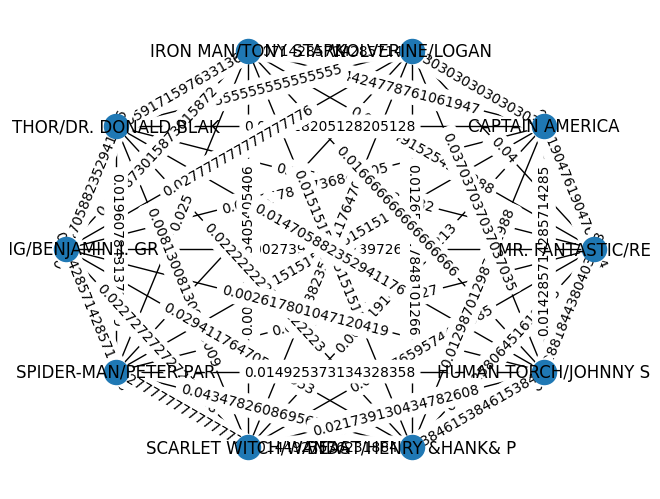

In [ ]:
# PLOT G1:

# Calculating the degree of each node(number of edges of the node):
degree = dict(G1.degree())

# Sorting the nodes by degre:
nodesort = sorted(degree, key=degree.get, reverse=True)

# Top N nodes:
N = 10
TOP_N = nodesort[:N]

# Selecting only N nodes in another graph
GTOPN = G1.subgraph(TOP_N)

# Spring layout: (gives a well positioned graph)
SL = nx.circular_layout(GTOPN)

# Drawing the graph:
nx.draw(GTOPN, SL, with_labels=True)

# To draw the WEIGHTED graph, we create a dictionary to give to "nx.draw_networkx_edge_labels"
# input in correct format(in another way raise a key error)
weights = {(x, y): d['weight'] for x, y, d in GTOPN.edges(data=True)}
nx.draw_networkx_edge_labels(GTOPN, SL, edge_labels=weights)

# Plot:
plt.show()

$Second\: Graph\: G2$<br>
The data in 'nodes.csv' and 'edges.csv' is used to construct the second graph. We use as nodes and the ones found in 'nodes.csv' and attach their type based on the information in the same file, and as edges the couples contained in the rows of data in 'edges.csv' when the hero has appeared in that specific comic. This graph is assumed to be undirected and unweighted. So our graph will contain heroes and comics, and each hero will be connected to all the comics he/she appears in.

In [ ]:
# Creating G2:
G2 = nx.Graph()

# Adding the nodes to the graph
for i, row in nclean.iterrows():
    node_id = row['node']
    node_type = row['type']
    G2.add_node(node_id, type=node_type)

# Adding the edges to the graph
for i, row in eclean.iterrows():
    hero = row['hero']
    comic = row['comic']
    G2.add_edge(hero, comic)

In [ ]:
print("Number of nodes:", G2.number_of_nodes())
print("Number of edges:", G2.number_of_edges())

Number of nodes: 19090
Number of edges: 96104


## 2 - Backend Implementation

Premise: in each functionality implementation, we add a filter for the *top N heroes* that we may be requested to work with to reduce computation time and improve network visualization. We recall that the top N heroes are the top N heroes who have appeared in the most number of comics. When the value of N is not set by the user, the functions will consider the whole data.

### Functionality 1 - Extract the graph's features

First individually

- The number of nodes in the network (if type 2, report for both node types)

In [ ]:
def number_nodes(graph, graph_type):
  
  if graph_type == 1:
    n_nodes_G_1 = graph.number_of_nodes()
    return n_nodes_G_1

  elif graph_type == 2:
    grouped_nodes = nodes.groupby('type')
    num_nodes_per_type_G_2 = grouped_nodes.size().reset_index(name='count')
    return num_nodes_per_type_G_2

- The number of collaborations of each superhero with the others (only if type 1)

In [ ]:
def superhero_collaborations(graph, graph_type, n):
    
    if graph_type == 1:
        # Create a dictionary to store the collaboration counts (degrees) for each superhero
        degrees = dict(graph.degree())
        # sort the dictionary by descending order and take the first n
        sorted_degrees = sorted(degrees.items(), key=lambda x: -x[1])[:n]
        return sorted_degrees 

- The number of heroes that have appeared in each comic (only if type 2)

In [ ]:
def n_heroes_in_comic(graph,graph_type,n): 
    
  if graph_type == 2:
      # Create a dictionary to store the apparisons counts for heroes in each comic
      comic = {x: graph.degree[x] for x in graph.nodes if graph.nodes[x]['type']=='comic'}
      # Sort the dictionary by by descending order and take the first n
      sort_dict = sorted(comic.items(), key=lambda x: -x[1])[:n]
      return sort_dict
    

In [ ]:
# with pd.df
# hero_appeard = edges.groupby('comic').count().sort_values(by='hero', ascending=False)[:n]

- The network's density

Density of a network $= \frac{number\: of\: edges}{number\: of\: nodes \:*\: (\frac{number\: of\: nodes\: -\: 1}{2})}$

In [ ]:
def density(graph):

  density = round(nx.density(graph),4)
  return density

- The network's degree distribution

In [ ]:
def degree_distribution(graph):
    degree_count={}                       # {degree:value}
    for node in graph.nodes():
        degree=graph.degree(node)
        if degree not in degree_count: 
            degree_count[degree] = 1
        else:
            degree_count[degree] += 1     # +1 if already seen that node
    result = dict(sorted(degree_count.items()))
    return result

- The average degree of the network $= \frac{Total\: number\: of\: edges}{Number\: of\: nodes}$

In [ ]:
def avg_degree(graph): 
    return round(sum(n for _, n in graph.degree()) / graph.number_of_nodes(),3)

- The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)

In [ ]:
def hubs(graph,type_, n):
    degrees = {}
    for node in graph:
        degrees[node] = len(graph[node])
    degree_values = np.array(list(sorted((degrees.values()))))
    percentile_95 = np.percentile(degree_values, 95)    # 95th percentile value

    # We use the percentile_95 to identify the hubs of the graph. 
    # => A node is a hub if its degree is greater than the 95th percentile.

    # By filtering the degrees dictionary using a list comprehension but by type
    if type_== 1:
        hubs = [node for node, degree in degrees.items() if degree > percentile_95][:n]
    # We care only about comics
    elif type_== 2:
        comics = {x: graph.degree[x] for x in graph.nodes if graph.nodes[x]['type']=='comic'}
        hubs = [node for node, degree in comics.items() if degree > percentile_95][:n]

    return hubs

- Whether the network is sparse or dense:

    In mathematics, a **dense network** is a network in which the number of edges is close to the maximal number of edges (where every pair of vertices is connected by one edge). The opposite, a network with only a few edges, is a **sparse network**.
    
    In general a network is considered sparse if its density is less than 0.5. If the density is greater than or equal to 0.5, the network is considered dense.

In [ ]:
def sparsity(graph):
    density = round(nx.density(graph))
    result = []
    if density < 0.5:
        result = 'Sparse'
    else:
        result = 'Dense'
    return result

In [ ]:
# Function for [N:] nodes data removal

def N_filter(graph,N):

    # Extract heroes(nodes) not in the top N 
    top = edges.groupby(by = 'hero')['comic'].count().sort_values(ascending=False).index
    last = (top[N:])
    
    # We use a copy of our graph to remove heroes(nodes) not in top N 
    graph=graph.copy()
    graph.remove_nodes_from(last) 
    return(graph)
    

In [ ]:
# Function for [N:] nodes data removal

def N_filter(graph,N):

    # Extract heroes(nodes) not in the top N 
    top = edges.groupby(by = 'hero').count().sort_values('comic',ascending=False)
    last = list(top.iloc[N:].index)
    
    # We use a copy of our graph to remove heroes(nodes) not in top N 
    graph=graph.copy()
    graph.remove_nodes_from(last) 
    return(graph)

Now all in one function:

In [ ]:
'''
Inputs:
 The graph data (G1 or G2)
 The graph type (1 or 2)
 N: denoting the top N heroes that their data should be considered
 n: number of items in output
'''
def functionality_1(graph, graph_type, N, n):
  
  # Last N nodes data removal
  graph = N_filter(graph,N)

  print(f'In the following rows the main features of the graph {graph_type}: \n ')
  print(f'The number of nodes of the network is: \n {number_nodes(graph, graph_type)} \n ') 
  print(f'The number of collaborations of each superhero with the others are: \n {superhero_collaborations(graph, graph_type, n)} \n ')
  print(f'The number of heroes that have appeared in each comic are: \n {n_heroes_in_comic(graph,graph_type,n)} \n ')
  print(f"The density is: \n {density(graph)} \n ")
  print(f"The degree distribution is: \n {degree_distribution(graph)} \n ") 
  print(f"The average degree is the following: \n {avg_degree(graph)} \n ") 
  print(f"Network's hubs are: \n {hubs(graph,graph_type, n)} \n ")
  print(f"The network is \n {sparsity(graph)} \n ")

In [ ]:
functionality_1(G1, 1, 600, 5)

In the following rows the main features of the graph 1: 
 
The number of nodes of the network is: 
 1021 
 
The number of collaborations of each superhero with the others are: 
 [('CAPTAIN AMERICA', 578), ('SPIDER-MAN/PETER PAR', 556), ('IRON MAN/TONY STARK', 519), ('MR. FANTASTIC/REED R', 519), ('THING/BENJAMIN J. GR', 501)] 
 
The number of heroes that have appeared in each comic are: 
 None 
 
The density is: 
 0.0869 
 
The degree distribution is: 
 {0: 2, 1: 17, 2: 26, 3: 20, 4: 21, 5: 17, 6: 23, 7: 22, 8: 34, 9: 29, 10: 24, 11: 21, 12: 18, 13: 17, 14: 13, 15: 19, 16: 4, 17: 2, 18: 9, 19: 17, 20: 6, 21: 3, 22: 1, 23: 5, 24: 6, 25: 16, 26: 1, 27: 7, 28: 2, 29: 1, 30: 8, 31: 4, 32: 3, 33: 2, 34: 6, 35: 4, 36: 7, 37: 2, 38: 1, 39: 5, 40: 5, 41: 4, 42: 7, 43: 7, 44: 2, 46: 5, 47: 6, 48: 4, 49: 4, 51: 6, 52: 6, 53: 5, 54: 3, 55: 3, 56: 2, 57: 4, 58: 1, 59: 6, 60: 1, 61: 5, 62: 2, 63: 1, 64: 3, 65: 1, 66: 5, 67: 8, 68: 5, 69: 2, 70: 5, 71: 3, 72: 6, 73: 4, 74: 5, 75: 3, 76: 4, 77: 6, 78

In [ ]:
functionality_1(G2, 2, 600, 5)

In the following rows the main features of the graph 2: 
 
The number of nodes of the network is: 
     type  count
0  comic  12651
1   hero   6439 
 
The number of collaborations of each superhero with the others are: 
 None 
 
The number of heroes that have appeared in each comic are: 
 [('COC 1', 88), ('H2 279', 75), ('IW 2', 71), ('IW 3', 71), ('IW 4', 64)] 
 
The density is: 
 0.0008 
 
The degree distribution is: 
 {0: 513, 1: 1981, 2: 1642, 3: 1353, 4: 1307, 5: 1069, 6: 951, 7: 771, 8: 640, 9: 547, 10: 388, 11: 348, 12: 257, 13: 184, 14: 133, 15: 97, 16: 76, 17: 98, 18: 47, 19: 45, 20: 34, 21: 28, 22: 10, 23: 12, 24: 8, 25: 11, 26: 12, 27: 16, 28: 34, 29: 26, 30: 19, 31: 15, 32: 31, 33: 20, 34: 18, 35: 19, 36: 15, 37: 15, 38: 12, 39: 17, 40: 10, 41: 11, 42: 12, 43: 5, 44: 9, 45: 12, 46: 10, 47: 7, 48: 10, 49: 9, 50: 4, 51: 6, 52: 5, 53: 1, 54: 5, 55: 6, 56: 4, 57: 7, 58: 10, 59: 2, 60: 3, 61: 2, 62: 2, 63: 3, 64: 5, 65: 6, 66: 5, 67: 3, 68: 1, 69: 3, 70: 2, 71: 10, 72: 4, 73: 3,

### Functionality 2 - Find top superheroes!

**Degree centrality** assigns an importance score based simply on the number of links held by each node. Tells us how many direct, ‘one hop’ connections each node has to other nodes in the network. It's useful for finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network. It is the simplest measure of node connectivity.

**Betweenness centrality** measures the number of times a node lies on the shortest path between other nodes. It shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one. It's useful for finding the individuals who influence the flow around a system and for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters.

**Closeness centrality** scores each node based on their ‘closeness’ to all other nodes in the network. This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. Useful for finding the individuals who are best placed to influence the entire network most quickly.

**PageRank** assigns nodes a score based on their connections, and their connections’ connections. It also takes link direction and weight into account – so links can only pass influence in one direction, and pass different amounts of influence. This measure uncovers nodes whose influence extends beyond their direct connections into the wider network. Because it takes into account direction and connection weight, PageRank can be helpful for understanding citations and authority.


If you consider the top N heroes based on one of these metrics and calculate the metric's value over the considered graph, you can determine the relative importance or influence of each hero in the graph.
If a particular hero has a high value for the chosen metric, this can tell you something about its role or importance in the graph. If the hero has a high betweenness centrality, it may be a key connector or bridge between different groups of heroes. If it has a high PageRank, it may be highly influential or well-respected by other heroes. If it has a high closeness centrality, it may be well-connected and able to reach other heroes quickly. If it has a high degree centrality, it may be well-connected and have a large number of connections to other heroes.


In [ ]:
'''
Input:
- The graph data
- A node (hero or comic)
- One of the given metrics : Betweeness , PageRank, ClosenessCentrality , DegreeCentrality
- N: denoting the top N heroes that their data should be considered

Output:
- The metric's value over the considered graph
- The given node's value
'''

def functionality_2(graph, node, metric, N):
    
  # Last N nodes data removal
  graph = N_filter(graph,N)


  if metric == 'Betweenness':
    bet =  nx.betweenness_centrality(graph)[node]
    return round(bet,3)
  elif metric == 'PageRank':
    pr = nx.pagerank(graph)[node]
    return round(pr,3)
  elif metric == 'Closeness':
    cl = nx.closeness_centrality(graph)[node]
    return round(cl,3)
  elif metric == 'Degree':
    dg = nx.degree_centrality(graph)[node]
    return round(dg,3)

In [ ]:
# Testing
node = 'SPIDER-MAN/PETER PAR'
centr_m = ['Degree','Betweenness','Closeness','PageRank']
c_m = []
print(node,'in graph 1')
for i in centr_m:
    m = functionality_2(G1, node, i, 600)
    c_m.append(m)
    print(f'{i} Centrality: {m}')

SPIDER-MAN/PETER PAR in graph 1
Degree Centrality: 0.545
Betweenness Centrality: 0.052
Closeness Centrality: 0.683
PageRank Centrality: 0.005


The node *SPIDER-MAN/PETER PAR* in *network 1* has good Closeness and Degree Centrality:  very well connected, can reach quickly other heroes, and has a large amount of connections to other nodes. He's not a good bridge between different groups of heroes

In [ ]:
# It takes 25 m to run

'''
node = 'SPIDER-MAN/PETER PAR' 
centr_m = ['Degree','Betweenness','Closeness','PageRank']
c_m = []
print(node,'in graph 2')
for i in centr_m:
   m = functionality_2(G2, node, i, 600)
   c_m.append(m)
'''

"\nnode = 'SPIDER-MAN/PETER PAR' \ncentr_m = ['Degree','Betweenness','Closeness','PageRank']\nc_m = []\nprint(node,'in graph 2')\nfor i in centr_m:\n   m = functionality_2(G2, node, i, 600)\n   c_m.append(m)\n"

SPIDER-MAN/PETER PAR in graph 2

DegreeCentrality: 0.119

BetweenessCentrality: 0.144

ClosenessCentrality: 0.352

PageRank: 0.011

The node *SPIDER-MAN/PETER PAR* in *network 2* compared to the *1* has worst Closeness and Degree Centrality but better PageRank and Betweeness: now it's a better bridge between different groups of heroes, but not as good as before well-connected.

### Functionality 3 - Shortest ordered Route

Input: <br>
- The graph data
- A sequence of superheroes $h = [h_2,\: ...,\: h_n-1]$;
- Initial node $h_1$ and an end node $h_n$;
- $N$: denoting the top $N$ heroes that their data should be considered.

Output:
- The shortest walk of comics that you need to read to get from $h_1$ to $h_n$.

This functionality only applies to the second graph, $G2$. In discrete mathematics, a walk can be defined as a sequence of edges and vertices of a graph, just like a path. However, in a path neither edges nor nodes are allowed to be repeated when traversing the graph, whereas in a walk it can happen. Moreover, a walk is said to be "open" if the starting and ending vertices are different. So we're looking for open walks on $G2$ that give us the ordered route, through comics, to get from a hero to another one. In order to coerce the passage through the sequence of intermediate superheroes, we approach the problem as follows: we consider the ordered sequence $h = [h_1, \: h_2,\: ...,\: h_n-1, \: h_n]$ complete with all the heroes to visit and <u>ordered</u>. To find the shortest walk from the first to the last node, we compute the shortest walks between $h_i$ and $h_{i+1}$ for $i = 1, 2, ..., n$ and then concatenate all these walks into one. To actually compute the walk, we choose the **BFS** algorithm. Every time, we have to pay attention not to visit some other node of the sequence: to do so, whenever we meet another node of the sequence, we'll just not consider it as a potential route for the current couple of heroes and go trying other directions. 

Let's start defining some auxiliary functions:

- Define the $top\_N\_heroes$ filter.

In [ ]:
def top_N_heroes(G, N):
  # Cast N to int
  N = int(N)
  # Create copy of the input graph
  graph = G.copy()
  # Select the less important heroes
  heroes_to_remove = list(edges.hero.value_counts().index)[N:]
  # Remove them from the graph
  graph.remove_nodes_from(heroes_to_remove)
  # Return subgraph containing top heroes
  return graph

In [ ]:
# Example
G = top_N_heroes(G2, 100)

- Define a $check\_top\_N$ function, to make sure everything works well in the previous one.

In [ ]:
def check_top_N(G):
  # Get all the nodes of graph with information attached
  data = list(G.nodes(data = True))
  # Initialize empty counters
  count_heroes = 0
  count_comics = 0
  # scan nodes and count heroes and comics
  for t in data:
    if t[1]['type'] == 'hero':
      count_heroes += 1
    elif t[1]['type'] == 'comic':
      count_comics += 1
  # Print the subsets of heroes and comics
  print(f"\n{G} nodes:", len(G.nodes()), '\n')
  print("-> Heroes:", count_heroes, '\n')
  print("-> Comics:", count_comics, '\n')
  return

In [ ]:
# Example
check_top_N(G)


Graph with 12751 nodes and 38111 edges nodes: 12751 

-> Heroes: 100 

-> Comics: 12651 



- Define a $main\_component$ function to compute the largest connected component of the input graph (will be used later).

In [ ]:
def main_component(g):
  # Get all the connected components of g as graphs
  graphs = [g.subgraph(c) for c in nx.connected_components(g)]
  # Note: connected_components generates a sorted list of all
  # connected components of input graph, largest first.
  # We can just return the first graph.
  return graphs[0]

- Define $bfs\_from\_scratch$ function. <br>
  This function is wrapped in the previous one and consists in a home-made version of the **BFS** algorithm. It will look for the shortest path between a pair of given nodes, being careful not to traverse the other ones that still have to come in the ordered sequence.

In [ ]:
def bfs_from_scratch(g, init, end, next_heroes):
  # Initialize list of visited nodes to first node
  visited = [init]
  # Initialize walk to the only node isited so far
  walk = [[init]]
  walk_index = 0

  # Loop to explore walks
  while walk_index < len(walk):
    # Extract current path
    current_walk = walk[walk_index]
    # Extract current node
    current_node = current_walk[-1]
    # Get list of node's neighbours
    neighbours = list(g.neighbors(current_node))

    # If the end node is neighbour of the current, stop and return
    if end in neighbours:
      current_walk.append(end)
      return current_walk
    
    # Explore all the neighbours of current node
    for neighbour in neighbours:
      # If a neighbour isn't visited AND isn't one of the other nodes in the sequence, explore it
      if (not neighbour in visited) and (not neighbour in next_heroes):
        # Build new path
        new_walk = current_walk[:]
        new_walk.append(neighbour)
        walk.append(new_walk)
        # Mark the neighbour as visited
        visited.append(neighbour)

    # Update the index of the walk to consider
    walk_index += 1

  # If the algorithm arrives here, no walk has been found
  return "No walk has been found between the given nodes."

- Define $functionality\_3$ function. <br>
  This function will take care of applying the top $N$ filter, handle the case of unconnected graph, and finally call $bfs\_from\_scratch$ to compute the shortest path among all couples of nodes in the whole sequence $[h_1,\: h_2, \: \dots, \: h_{n-1}, \: h_n]$. As already said, the final result will be the concatenation of all these intermediate shortest paths.

In [ ]:
def functionality_3(g, seq, init_node, end_node, N):
  
  # If N is not specified, whork on whole dataset
  if (N == ''):
    N = len(G2.nodes())

  g = top_N_heroes(G2, N)

  # Handle the case that g is not connected
  if not nx.is_connected(g):
    print("\n[WARNING] - The input graph is disconnected.\n",
          "The output is computed on its largest connected component.\n")
    # Work on largest connected component of g
    g = main_component(g)
  
  # Initialize path to starting node
  path = [init_node]
  # Insert init_node and end_node as endpoints of the sequence
  seq.insert(0, init_node)  # put in first position
  seq.append(end_node)      # put in last position

  # Initialize empty list for the heroes left to visit
  remaining = []

  # Iterate on input sequence
  for i in range(len(seq) - 1):
      # Update the list of heroes left
      if i != len(seq) - 2:
        remaining = seq[i + 2:]
      # Compute shortest walk between couples of heroes
      if ((seq[i] in g) and (seq[i + 1] in g)):
        path = path + list(bfs_from_scratch(g, seq[i], seq[i + 1], remaining))[1:]
      else:
        print("[ERROR] - One of the heroes is not found in the subgraph.",
              "\nPlease specify a larger N.")
        return

  return path

In [ ]:
# Example
N = input("Insert N = ")
sequence = ['IRON MAN/TONY STARK', 'COLOSSUS']
G = nx.Graph()
functionality_3(G, sequence, 'SPIDER-MAN/PETER PAR', 'DEADPOOL/JACK/WADE W', N)

Insert N = 6100

[WARNING] - The input graph is disconnected.
 The output is computed on its largest connected component.



['SPIDER-MAN/PETER PAR',
 'A 118',
 'IRON MAN/TONY STARK',
 "A '00",
 'CAPTAIN AMERICA',
 'TTA 58',
 'COLOSSUS',
 'TTA 58',
 'ANT-MAN/DR. HENRY J.',
 'BP3 23',
 'DEADPOOL/JACK/WADE W']

- Define $functionality\_3\_test$ function to double-check the behaviour of our implementation. This one exploits the predefined function `shortest_path` from the library `networkx` to compute the route from one node to the other.

> Note: `shortest_path` is faster than our function, but may traverse any node of the sequence in an unexpected moment, so there's no way to guarantee that the nodes are effectively visited in the specified order.

In [1]:
def functionality_3_test(g, seq, init_node, end_node, N):
  
  # If N is not specified, whork on whole dataset
  if (N == ''):
    N = len(G2.nodes())

  g = top_N_heroes(G2, N)

  # Handle the case that g is not connected
  if not nx.is_connected(g):
    print("\n[WARNING] - The input graph is disconnected.\n",
          "The output is computed on its largest connected component.\n")
    # Work on largest connected component of g
    g = main_component(g)
  
  # Initialize path to starting node
  path = [init_node]
  # Insert init_node and end_node as endpoints of the sequence
  seq.insert(0, init_node)  # put in first position
  seq.append(end_node)      # put in last position

  # Iterate on input sequence
  for i in range(len(seq) - 1):
      if ((seq[i] in g) and (seq[i + 1] in g)):
        path = path + list(nx.shortest_path(g, seq[i], seq[i + 1]))[1:]
      else:
        print("[ERROR] - One of the heroes is not found in the subgraph.",
              "\nPlease specify a larger N.")
        return

  return path

In [ ]:
# Example
N = input("Insert N = ")
sequence = ['IRON MAN/TONY STARK', 'COLOSSUS']
G = nx.Graph()
functionality_3(G, sequence, 'SPIDER-MAN/PETER PAR', 'DEADPOOL/JACK/WADE W', N)

Insert N = 6100

[WARNING] - The input graph is disconnected.
 The output is computed on its largest connected component.



['SPIDER-MAN/PETER PAR',
 'A 118',
 'IRON MAN/TONY STARK',
 'A 100',
 'ANT-MAN/DR. HENRY J.',
 'TTA 58',
 'COLOSSUS',
 'TTA 58',
 'ANT-MAN/DR. HENRY J.',
 'BP3 23',
 'DEADPOOL/JACK/WADE W']

> Notice that while $functionality\_3$ and $functionality\_3\_test$ return two different shortest walks, they have the same length, so are equally good for our purposes.

### Functionality 4 - Disconnecting Graphs

Input:

The graph data <br>
heroA: a superhero to which will relate sub-graph G_a <br>
heroB: a superhero to which will relate sub-graph G_b <br>
N: denoting the top N heroes that their data should be considered <br>

Output:

The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

A cut is minimal if divides the graph into two sets of nodes such that the sum of the weights of the edges of the cut is minimized.

In [ ]:
def minimum_number_of_linksG1(G1,hero1, hero2,N):
    # Calculating the TOP-N graph like in pre-processing:
    degree = dict(G1.degree())                                                  #calculating degree

    nodesort = sorted(degree, key=degree.get, reverse=True)                     #sorting the nodes by degree:

    TOP_N = nodesort[:N]                                                        #top N nodes:                                   
    
    GTOPN = G1.subgraph(TOP_N)                                                  #selecting only N nodes in another graph:

    # ALGORITHM TO CALCULATE MINIMUM NUMBER OF LINKS TO DISCONNECT THE GRAPH: 
    
    Ga = nx.Graph()                                                             #creating two new graphs related to the starting node(hero1,hero2):
    Gb = nx.Graph()
    
    Ga.add_nodes_from(GTOPN.nodes(data=True))                                   #adding nodes from TOP-N graph
    Gb.add_nodes_from(GTOPN.nodes(data=True))
                                                                         
    
    while len(set(Ga.nodes()) & set(Gb.nodes())) > 0:                           #calculating the minimum cut(based on edges weight)
        
        min_edge = None                                                         #initializing the edge with minimum weight and the weight to start:
        min_weight = float(1000000)                                             #initializing a weight that will be sure not minimum from start
        for hero1, hero2, weight in GTOPN.edges(data='weight'):                 #for every edges in TOP-N graph if is in start-end is in Ga-Gb or viceversa:
            if (hero1 in Ga and hero2 in Gb) or (hero1 in Gb and hero2 in Ga):       
                if weight < min_weight:                                         #if the edge has less weight:
                    min_edge = (hero1, hero2)                                   #set the minimum_edge
                    min_weight = weight                                         #update the minimum weight
        
        if min_edge[0] in Gb:
            Ga.add_edge(min_edge[0], min_edge[1], weight=min_weight)            #if the minimum edge is in Ga or Gb,add the minimum edge to the corresponding graph
            Gb.remove_node(min_edge[0])
        else:
            Ga.add_edge(min_edge[0], min_edge[1], weight=min_weight)            #if the minimum edge is in Ga or Gb,add the minimum edge to the corresponding graph
            Gb.remove_node(min_edge[1])
        
                                                              
        
    # DIFFERENCES BETWEEN THE GRAPH BEFORE AND AFTER THE CUT(Subtracting the cutted edges):
    common_edges = set()                                                        #initalize set of common edges

    for hero1, hero2 in GTOPN.edges():                                         #for every edges in TOP-N graph if is in Ga (in every verse) 
        if (hero1, hero2) in Ga.edges() or (hero2, hero1) in Ga.edges():
            common_edges.add((hero1, hero2))                                   #add to the set
 
    G2=GTOPN.copy()                                                            #copying the TOPN-N graph to avoid frozen error

    for hero1, hero2 in common_edges:                                          #remove the common edges from G2
                G2.remove_edge(hero1, hero2)

  
    return print("Result of minimum number of links to disconnect the graph:",len(common_edges),"\nBefore cut:",len(GTOPN.edges()),"\nAfter cut",len(G2.edges()))   #END


In [ ]:
#example of the output:
minimum_number_of_linksG1(G1,"IRON MAN/TONY STARK","CAPTAIN AMERICA",10)

Result of minimum number of links to disconnect the graph: 7 
Before cut: 45 
After cut 38


### Functionality 5 - Extracting Communities

In [ ]:
def func5(G,hero1,hero2,N):
    
    ###SELECTING TOP N-HEROES:
    degree = dict(G1.degree())

    nodesort = sorted(degree, key=degree.get, reverse=True)  #sorting the nodes by degre:

    TOP_N = nodesort[:N]                                     #top N nodes:

    GTOPN = G1.subgraph(TOP_N)                               #selecting only N nodes in another graph

    G = GTOPN.copy()                                         #creating a copy of the original graph

    ### STARTING ALGORITHM:

    edges_to_cut = 0                                         # setting number of edges to cut=o

    while nx.number_connected_components(G) == 1:            #until the graph is not disconnected
    
        edge_betwenness = nx.edge_betweenness_centrality(G)  #calculate the EBC, in order to remove the edge with highest EBC

        sorted_edges = sorted(edge_betwenness.items(), key=lambda x: -x[1]) # sort

        G.remove_edge(*sorted_edges[0][0])                   #removing the chosen edges
        
        edges_to_cut += 1                                    #counting edges to remove


    communities = list(nx.connected_components(G))           #founding the communities(connected components)
    for community in communities:
        if hero1 in community and hero2 in community:
            print("The heroes belong to the same community")
        elif hero1 in community and hero2 not in community:
            print("The heroes does not belong to the same community")
        elif hero1 not in community and hero2 in community:
            print("The heroes does not belong to the same community")
    
    return print("Number of edges to remove:", edges_to_cut,"\nNumber of Communities:",len(communities),"\nList of communities:", "\n1)",communities[0],"\n2)",communities[1])

In [ ]:
#example:
func5(GTOPN,"CAPTAIN AMERICA","IRON MAN/TONY STARK",50)

The heroes belong to the same community
Number of edges to remove: 44 
Number of Communities: 2 
List of communities: 
1) {'CAPTAIN AMERICA', 'THOR/DR. DONALD BLAK', 'QUICKSILVER/PIETRO M', 'HUMAN TORCH/JOHNNY S', 'ANT-MAN/DR. HENRY J.', 'NOVA/RICHARD RIDER', 'THING/BENJAMIN J. GR', 'BLACK WIDOW/NATASHA', 'STORM/ORORO MUNROE S', 'SCARLET WITCH/WANDA', 'NIGHTCRAWLER/KURT WA', 'DR. STRANGE/STEPHEN', 'SHADOWCAT/KATHERINE', 'JARVIS, EDWIN', 'MR. FANTASTIC/REED R', 'COLOSSUS II/PETER RA', 'SUB-MARINER/NAMOR MA', 'QUASAR III/WENDELL V', 'IRON MAN/TONY STARK', 'ROBERTSON, JOE', 'CANNONBALL II/SAM GU', 'BLACK KNIGHT V/DANE', 'WOLVERINE/LOGAN', 'CYCLOPS/SCOTT SUMMER', 'SHE-HULK/JENNIFER WA', 'CRYSTAL [INHUMAN]', 'SPIDER-MAN/PETER PAR', 'JAMESON, J. JONAH', 'INVISIBLE WOMAN/SUE', 'DAREDEVIL/MATT MURDO', 'ROGUE', 'ICEMAN/ROBERT BOBBY', 'RICHARDS, FRANKLIN B', 'HERCULES [GREEK GOD]', 'PROFESSOR X/CHARLES', 'PSYLOCKE/ELISABETH B', 'VISION', "BLACK PANTHER/T'CHAL", 'HAVOK/ALEX SUMMERS', 'WONDER MAN/

## 3 - Frontend Implementation

### Visualization 1 - Visualize some features of the network

In [ ]:
rows1 = [[1 ,number_nodes(G1, 1), density(G1), avg_degree(G1), sparsity(G1)]]
rows2 = [[2 ,number_nodes(G2, 2), density(G2), avg_degree(G2), sparsity(G2)]]

columns = ['Graph Type', 'Number of nodes', 'Density', 'Average Degree', 'Sparsity']
df = pd.DataFrame(rows1 + rows2, columns=columns)
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+--------------+-------------------+-----------+------------------+------------+
|    |   Graph Type | Number of nodes   |   Density |   Average Degree | Sparsity   |
|----+--------------+-------------------+-----------+------------------+------------|
|  0 |            1 | 6421              |    0.0081 |           52.048 | Sparse     |
|  1 |            2 | type  count       |    0.0005 |           10.069 | Sparse     |
|    |              | 0  comic  12651   |           |                  |            |
|    |              | 1   hero   6439   |           |                  |            |
+----+--------------+-------------------+-----------+------------------+------------+



A table that lists the network's hubs:

In [ ]:
df= pd.DataFrame({'Hubs graph 1': hubs(G1,1,10),'Hubs graph 2': hubs(G2,2,10)})
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+----------------------+----------------+
|    | Hubs graph 1         | Hubs graph 2   |
|----+----------------------+----------------|
|  0 | ANGEL/WARREN KENNETH | A 10           |
|  1 | ANT-MAN II/SCOTT HAR | A 118          |
|  2 | AURORA/JEANNE-MARIE  | A 12           |
|  3 | BLACK PANTHER/T'CHAL | A 15           |
|  4 | BLACK WIDOW/NATASHA  | A 16           |
|  5 | CAGE, LUKE/CARL LUCA | A 173          |
|  6 | CAPTAIN AMERICA      | A 188          |
|  7 | CRYSTAL [INHUMAN]    | A 18           |
|  8 | CYCLOPS/SCOTT SUMMER | A 19           |
|  9 | DARKSTAR/LAYNIA SERG | A 1            |
+----+----------------------+----------------+



A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)


In [ ]:
data_plot_sc = superhero_collaborations(G1,1,50)
# first 50 for visualization reasons

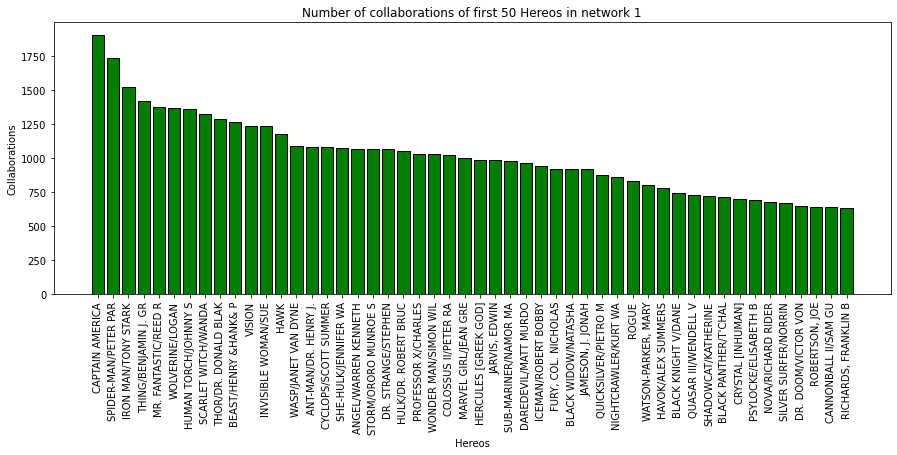

In [ ]:
x,y= zip(*data_plot_sc)

plt.figure(figsize=(15, 5))
plt.bar(x,y,edgecolor='black',color='green')
plt.title('Number of collaborations of first 50 Hereos in network 1')
plt.xlabel('Hereos')
plt.ylabel('Collaborations')
plt.xticks(rotation=90)

plt.show()


A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)


In [ ]:
data_plot_hc = n_heroes_in_comic(G2, 2, 50)

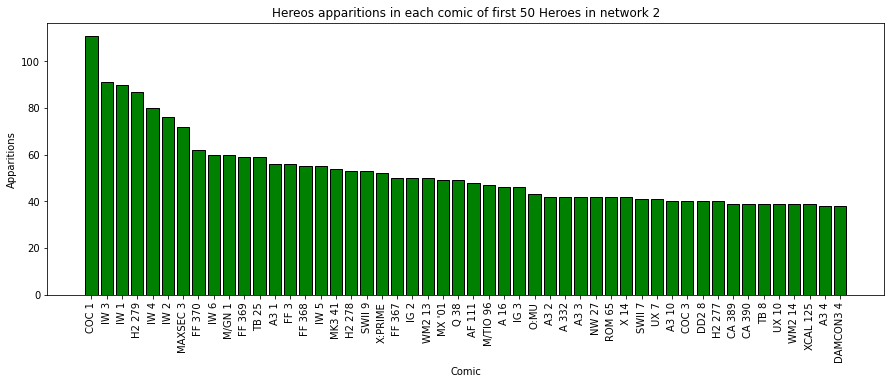

In [ ]:
x,y= zip(*data_plot_hc)

plt.figure(figsize=(15, 5))
plt.bar(x,y,edgecolor='black',color='green')
plt.title('Hereos apparitions in each comic of first 50 Heroes in network 2')
plt.xlabel('Comic')
plt.ylabel('Apparitions')
plt.xticks(rotation=90)

plt.show()


A plot depicting the degree distribution of the network

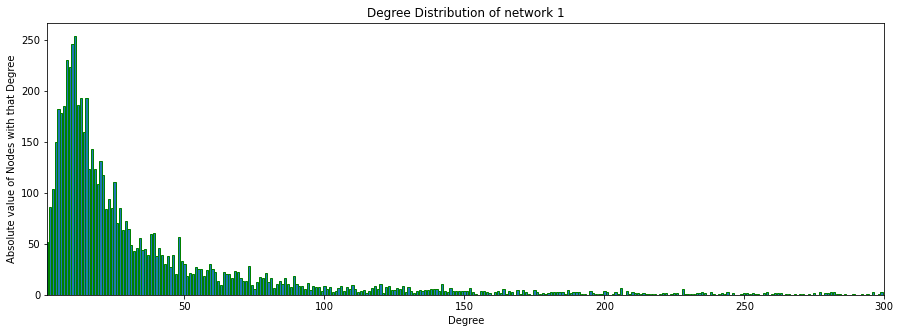

In [ ]:
d1 = degree_distribution(G1)

plt.figure(figsize=(15, 5))
plt.bar(d1.keys(), d1.values(), edgecolor='green')
plt.title('Degree Distribution of network 1')
plt.xlabel('Degree')
plt.ylabel('Absolute value of Nodes with that Degree')
plt.xlim(1,300) #for better visualization despite the lost of info 

plt.show()


We can observe a strong positive asimmetry (i.e. Mean < Median < Mode). A long right tail evidence the presence of strong nodes, the hubs: the best-loved and best-known primary and secondary protagonists of Marvel comics that collaborated in many storylines with other heroes. The main of the distro keeps being made by a lot of characters that accompany in good or in bad the "big names".

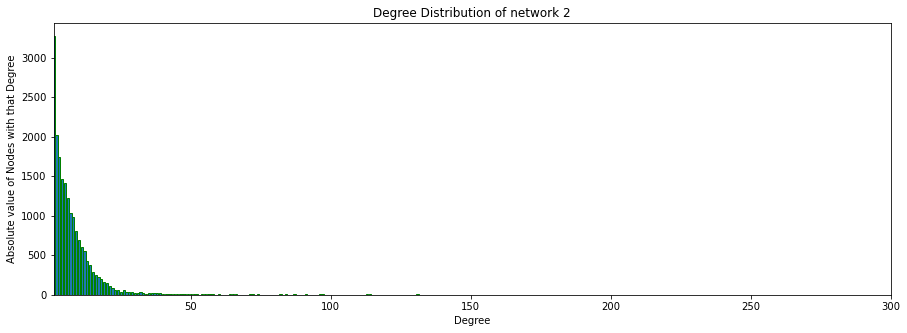

In [ ]:
d2 = degree_distribution(G2)

plt.figure(figsize=(15, 5))
plt.bar(d2.keys(), d2.values(), edgecolor='green')
plt.title('Degree Distribution of network 2')
plt.xlabel('Degree')
plt.ylabel('Absolute value of Nodes with that Degree')
plt.xlim(1,300)

plt.show()

In terms of asimmetry as before, but way stronger. A few heroes in a lot of comics, a lot heroes with a few presence.

### Visualization 2 - Visualize centrality measure

In [ ]:
def centrality_table(graph,metric,N):
    data = defaultdict(list)
    g = N_filter(graph,N)
    for node in g.nodes:
      data['node'].append(node)
      data['centrality'].append(functionality_2(graph, node, metric, N))

    data['average'] = sum(data['centrality'])/N

    return data

A table containing the information related to the requested centrality measure for:

- Node name
- The requested centrality measure's value for the given node
- The average of the requested centrality measure for all of the network's nodes

In [ ]:
c_table = pd.DataFrame(centrality_table(G1,"Degree",100))
c_table.head(10)

,node,centrality,average
0,ANGEL/WARREN KENNETH,0.256,0.26402
1,BLACK PANTHER/T'CHAL,0.193,0.26402
2,BLACK WIDOW/NATASHA,0.237,0.26402
3,"CAGE, LUKE/CARL LUCA",0.218,0.26402
4,CAPTAIN AMERICA,0.326,0.26402
5,CRYSTAL [INHUMAN],0.178,0.26402
6,CYCLOPS/SCOTT SUMMER,0.244,0.26402
7,DR. STRANGE/STEPHEN,0.218,0.26402
8,HAWK,0.269,0.26402
9,INVISIBLE WOMAN/SUE,0.261,0.26402


### Visualization 3 - Visualize the shortest-ordered route

- Print the comics in the output of Functionality 3 in order.

In [ ]:
def print_comics(walk):
  # Get nodes and their info from G2
  data = dict(G2.nodes(data = True))
  # Extract the comics
  output = [node for node in walk if data[node]['type'] == 'comic']
  # Build a string to print them nicely
  s = '\nComics to read: \t'
  for i in range(len(output) - 1):
    s += output[i] + '\t->\t'
  s += output[-1]
  print(s)
  return

In [ ]:
# Test with example walk (output of functionality_3 is always a list)
walk = ['SPIDER-MAN/PETER PAR', 'A 118', 'IRON MAN/TONY STARK', 'A 100', 'ANT-MAN/DR. HENRY J.', 'TTA 58',
        'COLOSSUS', 'TTA 58', 'ANT-MAN/DR. HENRY J.', 'BP3 23', 'DEADPOOL/JACK/WADE W']
print_comics(walk)


Comics to read: 	A 118	->	A 100	->	TTA 58	->	TTA 58	->	BP3 23


- Plot the graph of the nodes and edges that appear in the shortest walk, identifying each edge with the number of that passage in the walk.

In [ ]:
def plot_walk(walk):
  # Create walk graph
  G = nx.MultiGraph()
  # Add path nodes
  G.add_nodes_from(walk)
  # Add path edges
  for i in range(len(walk) - 1):
    G.add_edge(walk[i], walk[i + 1], weight = i + 1)
  # Set edge labels
  e_labels = [(u, v) for (u, v, d) in G.edges(data = True)]
  # Set position for all nodes + seed for reproducibility
  pos = nx.spring_layout(G, seed = 123)
  # Plot figure
  plt.figure(figsize = (10, 7))
  # Draw nodes
  nx.draw_networkx_nodes(G, pos, node_size = 700, node_color = '#87cefa')
  # Draw edges
  nx.draw_networkx_edges(G, pos, edgelist = e_labels, width = 3, alpha=0.5, edge_color = "black", style = "solid")
  # Draw node labels
  nx.draw_networkx_labels(G, pos, font_size = 10, font_family = "sans-serif")
  # Draw edge labels
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)
  # Adjustments
  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

  return

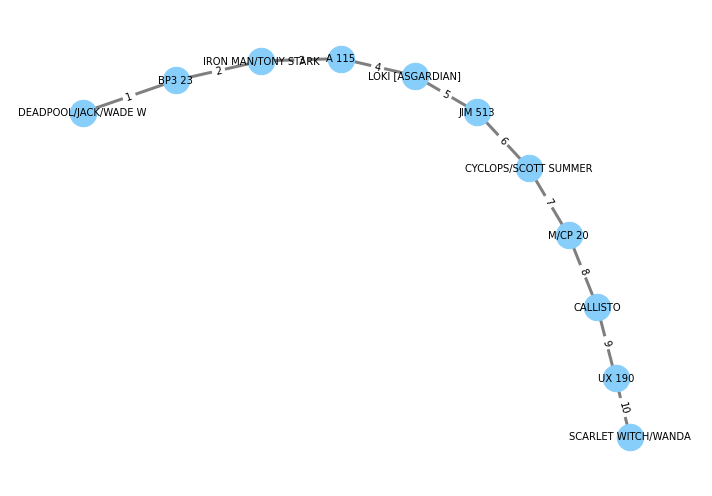

In [ ]:
# Test with example walk (output of functionality_3 is always a list)
walk =['DEADPOOL/JACK/WADE W', 'BP3 23', 'IRON MAN/TONY STARK', 'A 115', 'LOKI [ASGARDIAN]', 'JIM 513',
       'CYCLOPS/SCOTT SUMMER', 'M/CP 20', 'CALLISTO', 'UX 190', 'SCARLET WITCH/WANDA']
plot_walk(walk)

### Visualization 4 - Visualize the disconnected graph

#### 1) Print the number of the links that should be disconnected:

In [ ]:
minimum_number_of_linksG1(G1,"IRON MAN/TONY STARK","CAPTAIN AMERICA",10)

Result of minimum number of links to disconnect the graph: 7 
Before cut: 45 
After cut 38


#### 2) Plot the original graph:

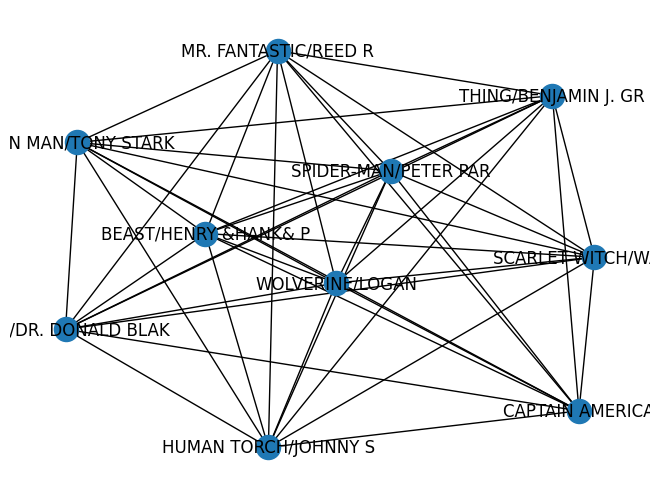

In [ ]:
nx.draw(GTOPN, with_labels=True)
plt.show()


#### 3) Plot the graph after removing the links and identify the two nodes:

In [ ]:
#Using the function of F4 to plot the cutted graph: (ADD SOME CHANGING ABOVE THE RETURN)
def minimum_cut_plot(G1,hero1, hero2,N):
    #Calculating the TOP-N graph like in pre-processing:
    degree = dict(G1.degree())                                       #calculating degree

    nodesort = sorted(degree, key=degree.get, reverse=True)          #sorting the nodes by degree:

    TOP_N = nodesort[:N]                                             #top N nodes:                                   
    
    GTOPN = G1.subgraph(TOP_N)                                       #selecting only N nodes in another graph:

    #ALGORITHM TO CALCULATE MINIMUM NUMBER OF LINKS TO DISCONNECT THE GRAPH: 
    
    Ga = nx.Graph()                                                   #creating two new graphs related to the starting node(hero1,hero2):
    Gb = nx.Graph()
    
    Ga.add_nodes_from(GTOPN.nodes(data=True))                         #adding nodes from TOP-N graph
    Gb.add_nodes_from(GTOPN.nodes(data=True))
    
    cutted_links = 0                                                  #initializing the cutted links counter to 0: 
    
    while len(set(Ga.nodes()) & set(Gb.nodes())) > 0:                 #calculating the minimum cut(based on edges weight),
        
        min_edge = None                                               #initializing the edge with minimum weight and the weight to start:
        min_weight = float(1000000)
        for u, v, weight in GTOPN.edges(data='weight'):               #for every edges in TOP-N graph if is in start-end is in Ga-Gb or viceversa:
            if (u in Ga and v in Gb) or (u in Gb and v in Ga):       
                if weight < min_weight:                               #if the edge has less weight:
                    min_edge = (u, v)                                 #set the minimum_edge
                    min_weight = weight                               #update the minimum weight
        
        if min_edge[0] in Gb:
            Ga.add_edge(min_edge[0], min_edge[1], weight=min_weight)  #if the minimum edge is in Ga or Gb,add the minimum edge to the corresponding graph
            Gb.remove_node(min_edge[0])
        else:
            Ga.add_edge(min_edge[0], min_edge[1], weight=min_weight)  #if the minimum edge is in Ga or Gb,add the minimum edge to the corresponding graph
            Gb.remove_node(min_edge[1])
        
        cutted_links += 1                                              #update the cutted links
        
    #DIFFERENCES BETWEEN THE GRAPH BEFORE AND AFTER THE CUT(Subtracting the cutted edges)
    common_edges = set()                                               #initalize set of common edges

    for u, v in GTOPN.edges():                                         #for every edges in TOP-N graph if is in Ga (in every verse) 
        if (u, v) in Ga.edges() or (v, u) in Ga.edges():
            common_edges.add((u, v))                                   #add to the set
 
    G2=GTOPN.copy()                                                    #copying the TOPN-N graph to avoid frozen error

    for u, v in common_edges:                                          #remove the common edges from G2
                G2.remove_edge(u, v)

    
    #PLOT IDENTIFYING THE TWO NODES:
    heroes = G2.nodes() 
    colors = []
    for hero in heroes:      
        if hero in [hero1, hero2]:
            colors.append('g')
        else:
            colors.append('r')

    
    return nx.draw(G2, with_labels=True, node_color=colors)   #PLOT
    plt.show()

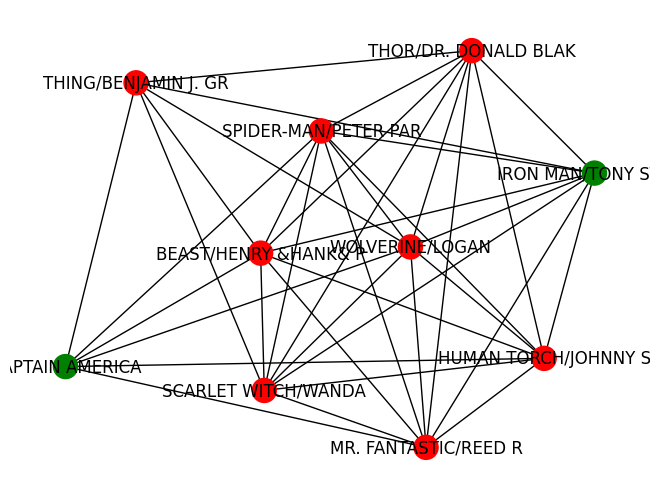

In [ ]:
minimum_cut_plot(G1,"IRON MAN/TONY STARK","CAPTAIN AMERICA",10)

### Visualization 5 - Visualize the communities

1) Print the number of links that should be removed to have the communities

In [ ]:
def func5_1(G,hero1,hero2,N):
    
    ###SELECTING TOP N-HEROES:
    degree = dict(G1.degree())

    nodesort = sorted(degree, key=degree.get, reverse=True)  #sorting the nodes by degre:

    TOP_N = nodesort[:N]                                     #top N nodes:

    GTOPN = G1.subgraph(TOP_N)                               #selecting only N nodes in another graph

    G = GTOPN.copy()                                         #creating a copy of the original graph

    ### STARTING ALGORITHM:

    edges_to_cut = 0                                         # setting number of edges to cut=o

    while nx.number_connected_components(G) == 1:            #until the graph is not disconnected
    
        edge_betwenness = nx.edge_betweenness_centrality(G)  #calculate the EBC, in order to remove the edge with highest EBC

        sorted_edges = sorted(edge_betwenness.items(), key=lambda x: -x[1]) # sort

        G.remove_edge(*sorted_edges[0][0])                   #removing the chosen edges
        
        edges_to_cut += 1                                    #counting edges to remove

    return print("Number of edges to remove:", edges_to_cut)

In [ ]:
func5_1(GTOPN,"CAPTAIN AMERICA","IRON MAN/TONY STARK",10)

Number of edges to remove: 9


2) A table depicting the communities and the heroes that belong to each community

In [ ]:
def func5_2(G,hero1,hero2,N):
    
    ###SELECTING TOP N-HEROES:
    degree = dict(G1.degree())

    nodesort = sorted(degree, key=degree.get, reverse=True)  #sorting the nodes by degre:

    TOP_N = nodesort[:N]                                     #top N nodes:

    GTOPN = G1.subgraph(TOP_N)                               #selecting only N nodes in another graph

    G = GTOPN.copy()                                         #creating a copy of the original graph

    ### STARTING ALGORITHM:

    while nx.number_connected_components(G) == 1:            #until the graph is not disconnected
    
        edge_betwenness = nx.edge_betweenness_centrality(G)  #calculate the EBC, in order to remove the edge with highest EBC

        sorted_edges = sorted(edge_betwenness.items(), key=lambda x: -x[1]) # sort

        G.remove_edge(*sorted_edges[0][0])                   #removing the chosen edges
        
    communities = list(nx.connected_components(G))  
    
    #### CREATING A TABLE:
    dict_com = {}                                            #creating a dictionary
    print("----------------------")                          #separators                
    for i, community in enumerate(communities):
        dict_com[f"Community {i+1}"] = list(community)       #adding the community with list()

    print("Community\tHeroes")                               #title
    print("----------------------")                              
    for community, heroes in dict_com.items():          
        print(f"{community}\t{heroes}")                      #print for each community, the community number and the heroes that belong to
        print("----------------------")
    return


In [ ]:
func5_2(GTOPN,"CAPTAIN AMERICA","IRON MAN/TONY STARK",5)

----------------------
Community	Heroes
----------------------
Community 1	['MR. FANTASTIC/REED R']
----------------------
Community 2	['IRON MAN/TONY STARK', 'SPIDER-MAN/PETER PAR', 'THING/BENJAMIN J. GR', 'CAPTAIN AMERICA']
----------------------


3) Plot the original graph

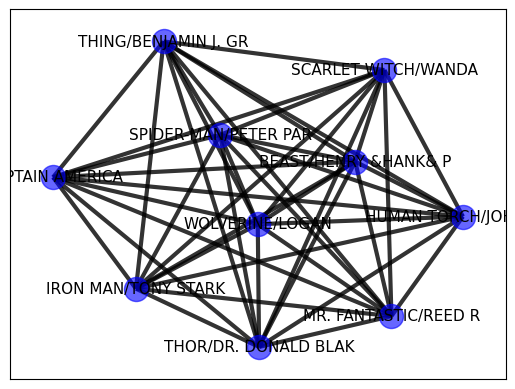

In [ ]:
#plot graph
SL=nx.spring_layout(GTOPN)
nx.draw_networkx_nodes(GTOPN, SL,node_color='b', alpha=0.6)
nx.draw_networkx_edges(GTOPN, SL, width=3.0, alpha=0.8)
labels = {}
for hero in GTOPN.nodes():
    labels[hero] = hero


nx.draw_networkx_labels(GTOPN, SL, labels, font_size=11)
    

#display the plot
plt.show()

4) Plot the graph showing the communities in the network
5) Plot the final graph and identify the community/communities of Hero_1 and Hero_2

In [ ]:
def func5_45(G,hero1,hero2,N):
    
    ###SELECTING TOP N-HEROES:
    degree = dict(G1.degree())

    nodesort = sorted(degree, key=degree.get, reverse=True)  #sorting the nodes by degre:

    TOP_N = nodesort[:N]                                     #top N nodes:

    GTOPN = G1.subgraph(TOP_N)                               #selecting only N nodes in another graph

    G = GTOPN.copy()                                         #creating a copy of the original graph

    ### STARTING ALGORITHM:

    edges_to_cut = 0                                         # setting number of edges to cut=o

    while nx.number_connected_components(G) == 1:            #until the graph is not disconnected
    
        edge_betwenness = nx.edge_betweenness_centrality(G)  #calculate the EBC, in order to remove the edge with highest EBC

        sorted_edges = sorted(edge_betwenness.items(), key=lambda x: -x[1]) # sort

        G.remove_edge(*sorted_edges[0][0])                   #removing the chosen edges
        
        edges_to_cut += 1                                    #counting edges to remove


    communities = list(nx.connected_components(G))           #founding the communities(connected components)

    #### PLOT

    SL = nx.spring_layout(G) # positions for all nodes


    nx.draw_networkx_nodes(G, SL, nodelist=communities[0], node_color='b', alpha=0.6)
    nx.draw_networkx_nodes(G, SL, nodelist=communities[1], node_color='r', alpha=0.6)

# edges
    nx.draw_networkx_edges(G, SL, width=3.0, alpha=0.8)
    labels = {}
    for hero in GTOPN.nodes():
        labels[hero] = hero

    nx.draw_networkx_labels(G, SL, labels, font_size=11)

    return plt.show()

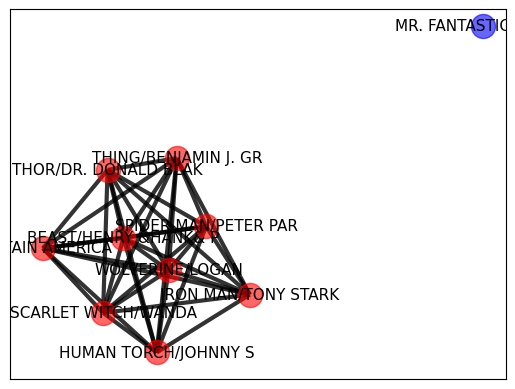

In [ ]:
func5_45(GTOPN,"CAPTAIN AMERICA","IRON MAN/TONY STARK",10)

## Algorithmic Question

The algorithm was implemented recursively. We consider a 3x3 matrix of points identified by a $x$ and a $y$ coordinate, so that its position is given by $(x, y)$. We choose the top-left corner as the origin, so that moving right and left corresponds to adding respectively $+1, -1$ to the $x$ coordinate, moving down and up corresponds to adding respectively $+1, -1$ to the $y$ coordinate. In this setup, our grid of points looks like this:

$$
(0, 0)\quad  (1, 0)\quad  (2, 0)\\
(0, 1)\quad  (1, 1)\quad  (2, 1)\\
(0, 2)\quad (1, 2)\quad  (2, 2)
$$

Given an input string containing the directions, we examine it one character at a time. The idea is:
- ***Base Step:*** if the pattern is complete, i.e. all the given directions have been successfully explored, count it as one valid path and return 1;
- ***Inductive step:*** consider the direction in which to go. If the next position in that direction is still valid, go explore it recursively. Moreover, if the next position of the next is still valid, mark the next as visited and explore the next of the next (we must consider patterns obtained by taking either one or two steps per direction, if possible). However, when we must pass to the two recursive call a different $visited$ list, or they will overwrite the same one. That's why at the beginning of `explore_patterns` function we create a copy of that variable.

In [ ]:
def print_grid():
    '''
    Auxiliary function to visually display the grid we work on.
    '''
    print('    ----- Grid -----   ')
    print(' ______________________')
    print('|(0, 0)  (1, 0)  (2, 0)|')
    print('|(0, 1)  (1, 1)  (2, 1)|')
    print('|(0, 2)  (1, 2)  (2, 2)|')
    print(' ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾')
    print('------------------------\n')
    return


def is_valid(x, y, visited):
    '''
    Auxiliary function that checks if the current position is valid,
    i.e. we're not exceeding the size of the grid and we're not intersecting
    any node already visited.
    '''
    # Check that current position coordinates don't exceed the grid limits
    if x < 0 or x >= 3 or y < 0 or y >= 3:
        return False
    # Check that the position hasn't already been visited
    if (x, y) in visited:
        return False
    return True

def explore_patterns(x, y, visited, directions):
    '''
    Recursive function that actually explores all the possible patterns that
    can be completed following the input directions, from a given starting point.
    Lists all the possible patterns and returns their number.
    '''
    # Mark current position as visited
    visited.append((x, y))
    # Create a copy of visited nodes
    visited_copy = visited.copy()

    # Base step
    # If the path is complete, return
    if not directions:
        print(visited)
        return 1

    # Inductive step
    # Initialize a counter for number of patterns
    count = 0
    # Consider one direction at a time
    direction = directions[0]
    # Right direction
    if direction == "R":
        # If next position is valid, go explore it
        if is_valid(x + 1, y, visited):
            count += explore_patterns(x + 1, y, visited, directions[1:])
        # If the next of the next position is valid, go explore that too
        if is_valid(x + 2, y, visited):
            # Mark the intermediate position as visited
            visited_copy.append((x + 1, y))                                         # work on copy of visited
            count += explore_patterns(x + 2, y, visited_copy, directions[1:])
    # Down direction
    elif direction == "D":
        if is_valid(x, y + 1, visited):
            count += explore_patterns(x, y + 1, visited, directions[1:])
        if is_valid(x, y + 2, visited):
            visited_copy.append((x, y + 1))                                         # work on copy of visited
            count += explore_patterns(x, y + 2, visited_copy, directions[1:])
    # Left direction
    elif direction == "L":
        if is_valid(x - 1, y, visited):
            count += explore_patterns(x - 1, y, visited, directions[1:])
        if is_valid(x - 2, y, visited):
            visited_copy.append((x - 1, y))                                         # work on copy of visited
            count += explore_patterns(x - 2, y, visited_copy, directions[1:])
    # Up direction
    elif direction == "U":
        if is_valid(x, y - 1, visited):
            count += explore_patterns(x, y - 1, visited, directions[1:])
        if is_valid(x, y - 2, visited):
            visited_copy.append((x, y - 1))                                         # work on copy of visited
            count += explore_patterns(x, y - 2, visited_copy, directions[1:])
    return count

def count_patterns(directions):
    '''
    Wrapper function that counts the possible patterns from 
    all the possible starting points of the grid.
    '''
    print("Input directions: %s" %directions)
    result = 0
    # Iterate on the grid coordinates and store total number of patterns
    for x in range(3):
        for y in range(3):
            result += explore_patterns(x, y, [], directions)
    return 'Number of patterns: %d' %result

In [ ]:
# Testing
print_grid()
print(count_patterns('DRU'), '\n')
print(count_patterns('R'), '\n')
print(count_patterns('LDRDRUL'), '\n')
print(count_patterns(''), '\n')

    ----- Grid -----   
 ______________________
|(0, 0)  (1, 0)  (2, 0)|
|(0, 1)  (1, 1)  (2, 1)|
|(0, 2)  (1, 2)  (2, 2)|
 ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
------------------------

Input directions: DRU
[(0, 0), (0, 1), (1, 1), (1, 0)]
[(0, 0), (0, 1), (1, 1), (2, 1), (2, 0)]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 1)]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0)]
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1)]
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0)]
[(0, 1), (0, 2), (1, 2), (1, 1)]
[(0, 1), (0, 2), (1, 2), (1, 1), (1, 0)]
[(0, 1), (0, 2), (1, 2), (2, 2), (2, 1)]
[(0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0)]
[(1, 0), (1, 1), (2, 1), (2, 0)]
[(1, 0), (1, 1), (1, 2), (2, 2), (2, 1)]
[(1, 0), (1, 1), (1, 2), (2, 2), (2, 1), (2, 0)]
[(1, 1), (1, 2), (2, 2), (2, 1)]
[(1, 1), (1, 2), (2, 2), (2, 1), (2, 0)]
Number of patterns: 15 

Input directions: R
[(0, 0), (1, 0)]
[(0, 0), (1, 0), (2, 0)]
[(0, 1), (1, 1)]
[(0, 1), (1, 1), (2, 1)]
[(0, 2), (1, 2)]
[(0, 2), (1, 2), (2, 2)]
[(1

> **Note:** if we pass the empty string as input, the function returns just the starting points.

### Time complexity Analysis

In our case $n$ is the length of the input direction string. Every time that `explore_patterns` is executed, it will run only the `if` branch corresponding to the direction currently considered. So we focus on the code inside a generic branch: it contains two recursive calls, both with input size $n - 1$. Thoretically, whatever the input is, we can't move on a 3x3 grid with step 2 for more than 3 times in the whole execution without returning on a visited node or intersecting the patterns drawn. So it's never the case that we make the double recursive call more than 3 times. In general it depends on the input, even though it will never be greater than 3. Now, for simplicity, we make the assumption that both calls are made each time; this way we obtain an upper bound of the actual time complexity of the algorithm. <br>
We have the following recurrence relation:

$$  
    T(n) =
    \begin{cases}
      c, \: \text{if $n = 0$} \\
      2T(n-1) + c, \: \text{if $n \ge 1$}
    \end{cases}     
$$

Unraveling along iterations, we have:

$$
T(n) = 2T(n-1) + c = \\
 = 2\: [\, 2T(n-2) + c \,] + c = 4T(n-2) + 3c  = \\
 = 4\: [\, 2T(n-3) + c \,] +3c = 8T(n-3) + 7c = \\
 = \: \cdots \: = 2^iT(n - i) + (2^i - 1)c = \: \cdots
$$

We have $T(0)$ when $n - i = 0$, i.e. $i = n$. At this point the general expression becomes:

  $$
  2^n T(0) + (2^n - 1)c \ = \  2^nc + (2^n - 1)c \ = \ (2^{n+1} - 1)c
  $$

So the input dependency is exponential and the running time is $O(2^{n+1})$. <br>
As we would expect, we pay the price of recursion with poor efficiency in terms of running time (and space, because we create an exponential number of copies of the `visited` list). Anyway, the grid on which the algorithm runs is fixed and has small dimensions (only 3x3), the execution will always be pretty fast and so we stick to this solution.